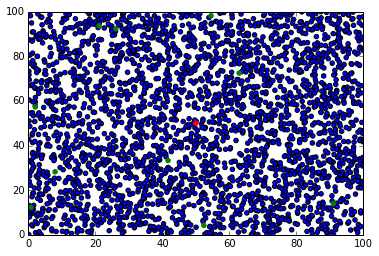

In [266]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

N = 3000
true_state = np.array([50, 50])
landmarks =  np.array([(np.random.random()*100, np.random.random()*100) for i in range(10)])
particles = np.array([(np.random.random()*100, np.random.random()*100) for i in range(N)])
weights = np.array([1. for i in range(N)])

def draw():
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.scatter(particles[:,0], particles[:, 1])
    plt.scatter(landmarks[:,0], landmarks[:, 1], color='green')
    plt.scatter([true_state[0]], [true_state[1]], color='red')
    
draw()

max_sense_dist = 60
z_noise = 4
def get_measurement(true_state):
    exp = np.apply_along_axis(lambda x: sqrt(x[0]**2 + x[1]**2), 1, landmarks - true_state)
    exp = np.sort(exp) + np.random.normal(scale=z_noise, size=exp.shape)
    return exp[exp <= max_sense_dist]
    

In [267]:
from math import sqrt
from scipy.stats import norm


def sense(particles, weights, landmarks, z):
    z = np.sort(z)
    for i, particle in enumerate(particles):
        exp = np.apply_along_axis(lambda x: sqrt(x[0]**2 + x[1]**2), 1, landmarks - particle)
        exp = np.sort(exp)
        p = norm.pdf(z - exp[:z.size], scale=z_noise)
        weights[i] *= np.prod(p)
    weights /= np.sum(weights)

In [268]:
move_noise = 1
def move(particles, u):
    particles += u + np.random.normal(scale=move_noise, size=particles.shape)
    

In [269]:
def resample(particles, weights):
    new_particles = np.zeros_like(particles)
    new_weights = np.zeros_like(weights)
    w_sum = np.cumsum(weights)
    for i in range(particles.shape[0]):
        c = np.random.random()
        j = np.argmax(w_sum > c)
        new_particles[i,:] = particles[j,:]
        new_weights[i] = weights[i]
    new_weights /= np.sum(new_weights)
    return new_particles, new_weights
        
    

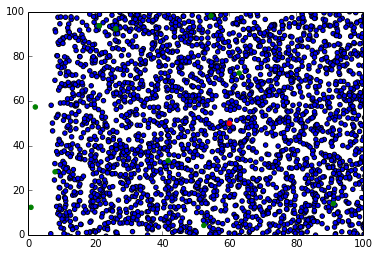

In [270]:
u = np.array([10, 0])
true_state += u
move(particles, u + np.random.normal(scale=move_noise, size=u.shape))

draw()

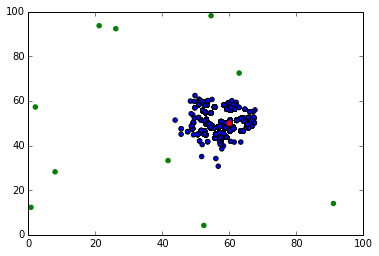

In [271]:
z = get_measurement(true_state)
sense(particles, weights, landmarks, z)
particles, weights = resample(particles, weights)
draw()


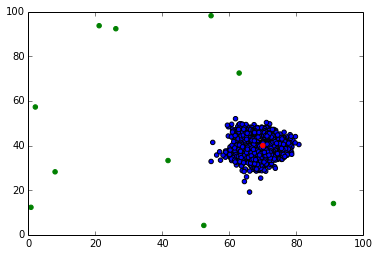

In [272]:
u = np.array([10, -10])
true_state += u
move(particles, u + np.random.normal(scale=move_noise, size=u.shape))

draw()

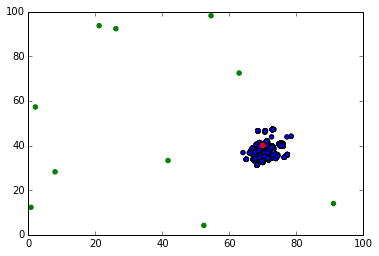

In [273]:
z = get_measurement(true_state)
sense(particles, weights, landmarks, z)
particles, weights = resample(particles, weights)

draw()

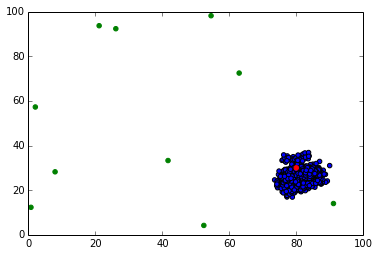

In [274]:
u = np.array([10, -10])
true_state += u
move(particles, u + np.random.normal(scale=move_noise, size=u.shape))

draw()

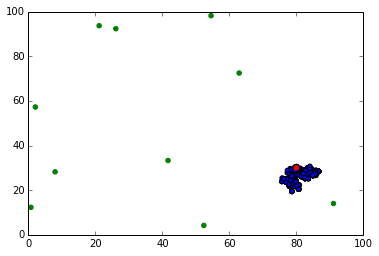

In [275]:
z = get_measurement(true_state)
sense(particles, weights, landmarks, z)
particles, weights = resample(particles, weights)
draw()